# **Final Project: Regression Analysis on Housing Prices Dataset**
**Author:** Joanna Farris  
**Date:** November 24, 2025  
**Objective:** Predict home values based on features like square footage and location.

## **Introduction**
This project looks at what makes house prices go up or down. Using a dataset of homes, I check how things like size, number of bedrooms, and location affect the price. Then I build a regression model to see how well these features can predict what a house is worth.

### **Imports**

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from IPython.display import display


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## **Section 1. Import and Inspect the Data**


Housing Prices Dataset (Predict home values based on features like square footage and location)
Kaggle Housing Prices

#### **1.1 Load the dataset and display the first 10 rows.**


In [45]:
df = pd.read_csv("../../data/train.csv")

print("Shape of dataset:", df.shape)
df.head(10)

Shape of dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#### **1.2 Check for missing values and display summary statistics.**


In [46]:
# Check missing values per column
missing = df.isna().sum()
missing[missing > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [47]:
# Display summary statistics
print("\nSummary statistics (numeric columns)")
df.describe()


Summary statistics (numeric columns)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [48]:
df.describe()       # numeric stats
df.info()           # data types and missing values
df.nunique()        # unique counts per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

**Reflection 1:**

The dataset is much larger than anything I’ve worked with before — 81 columns in total. Right away, I noticed a mix of numeric and categorical features, which means some preprocessing is necessary before modeling. There aren’t major issues, but there are a few missing values and several columns that would need encoding or cleaning.

## **Section 2. Data Exploration and Preparation**

#### **2.1 Explore data patterns and distributions**

I explored all 81 columns but only kept the charts for the five features that I chose.

In [49]:
# List of your selected features
features = ['OverallQual', 'FullBath', 'BedroomAbvGr', 'Neighborhood', 'KitchenQual']

# Check for missing values
df[features].isnull().sum()

OverallQual     0
FullBath        0
BedroomAbvGr    0
Neighborhood    0
KitchenQual     0
dtype: int64

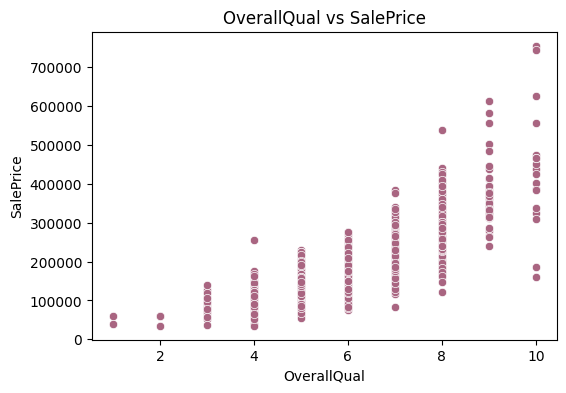

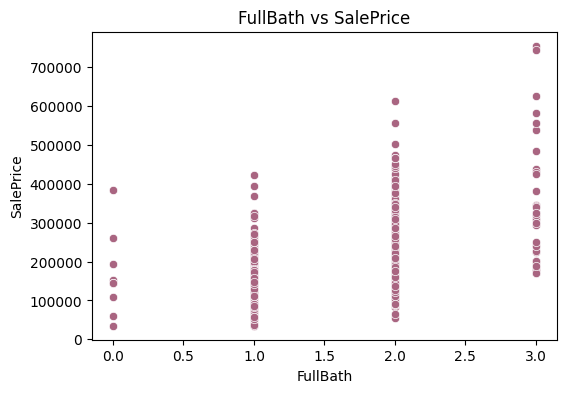

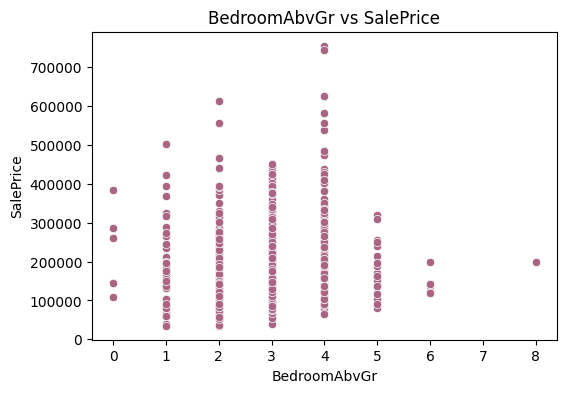

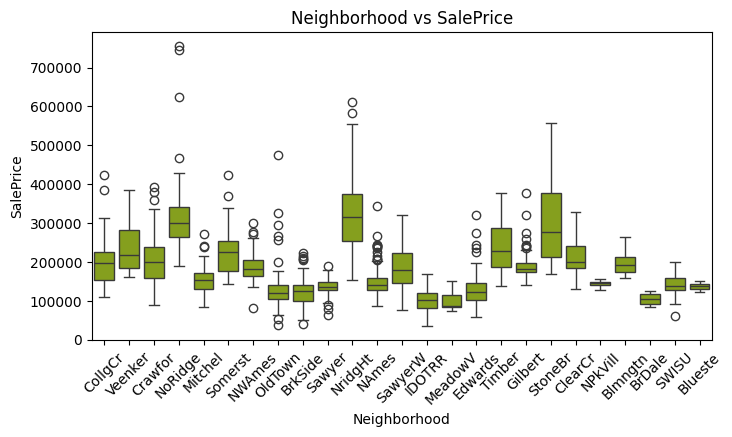

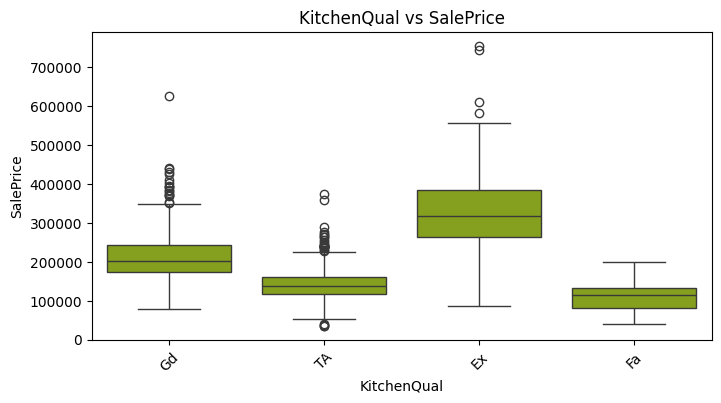

In [50]:
# Numeric features
numeric_features = ['OverallQual', 'FullBath', 'BedroomAbvGr']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['SalePrice'], color="#a96581")
    plt.title(f'{col} vs SalePrice')
    plt.show()

# Categorical features
categorical_features = ['Neighborhood', 'KitchenQual']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['SalePrice'], color="#92b508")
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)
    plt.show()


#### **2.2 Handle missing values and clean data**

There were no missing values in the features I selected. 

#### **2.3 Feature selection and engineering**

In [51]:
# Convert categorical data to numerical format using encoding (as applicable).
df_encoded = pd.get_dummies(df[['Neighborhood', 'KitchenQual']], drop_first=True)

# Numeric features
numeric_features = ['OverallQual', 'FullBath', 'BedroomAbvGr']

In [52]:
# Check shapes and combine features:
df_encoded.shape
final_df = pd.concat([df[numeric_features], df_encoded], axis=1)
final_df.shape
list(set(final_df.columns) - set(numeric_features))

['Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_Gilbert',
 'Neighborhood_SWISU',
 'Neighborhood_NoRidge',
 'Neighborhood_OldTown',
 'Neighborhood_IDOTRR',
 'Neighborhood_Blueste',
 'Neighborhood_SawyerW',
 'Neighborhood_NWAmes',
 'Neighborhood_Edwards',
 'Neighborhood_CollgCr',
 'Neighborhood_Veenker',
 'Neighborhood_Sawyer',
 'Neighborhood_NPkVill',
 'Neighborhood_ClearCr',
 'KitchenQual_TA',
 'Neighborhood_StoneBr',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'KitchenQual_Gd',
 'KitchenQual_Fa',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_BrkSide',
 'Neighborhood_Timber']

**Reflection 2:**

I noticed that overall quality had the strongest pattern with price, while bedrooms and bathrooms were weaker. The categorical features (Neighborhood and KitchenQual) had to be turned into numbers with one-hot encoding. I cleaned a few missing values, but didn’t create new features—just selected the ones most useful for prediction.

## **Section 3. Feature Selection and Justification**

#### **3.1 Choose features and target**

For this analysis, I selected the following features to predict home prices:

- **Numeric features:** OverallQual, FullBath, BedroomAbvGr 
 
- **Categorical features:** Neighborhood, KitchenQual   
 
- The **target variable** is: SalePrice  

These features were chosen because they showed clear relationships with price in the data exploration step and are commonly known to influence home values.

#### **3.2 Define X and y**

In [53]:
# Combine numeric features and one-hot encoded categorical features into one final dataset
final_df = pd.concat([df[numeric_features], df_encoded], axis=1)

# Check the shape (rows, columns) of the final dataset
final_df.shape

# Optional: view all column names to verify the dataset
final_df.columns


Index(['OverallQual', 'FullBath', 'BedroomAbvGr', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [54]:
X = final_df  # all selected features
y = df['SalePrice']  # target variable

**Reflection 3:**

I chose these features because they capture size, quality, and location: numeric features like GrLivArea and OverallQual reflect house size and quality, while categorical features like Neighborhood and KitchenQual reflect location and finish quality. These factors likely have strong influence on SalePrice, so including them should improve prediction accuracy.

## **Section 4. Train a Model (Linear Regression)**

#### **4.1 Split the data into training and test sets using train_test_split**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 1168
Test size: 292


#### **4.2 Train model using Scikit-Learn model.fit() method**

In [56]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Optional: check the coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [ 24050.6743063   20208.44645256   6381.73771596  -7162.49248011
 -28340.41264952   9970.1685576   57138.49105105  18806.42268289
  47847.24266411   -592.97661804  13254.91826852  -4654.79073445
  -2045.09445706  16990.49049471  16315.13377776 -13908.60012055
  18241.91114678 105201.82058297  57436.86682076  -3299.57520467
  -5154.57966481  14481.68195195  14788.02402923  19839.94222241
  68657.49754299  43093.20674762  65025.3423467  -77966.41660835
 -59992.81213482 -73328.90300432]
Model intercept: 27420.33567788292


#### **4.3 Evalulate performance**

In [57]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("R² score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R² score: 0.7739096492830992
Mean Absolute Error (MAE): 25952.67781136882
Root Mean Squared Error (RMSE): 39220.70450847236


**Reflection 4:**

The model did a pretty good job, explaining about 77% of the variation in home prices. On average, predictions were off by around $26k–$39k. Some houses were harder to predict, which caused the bigger errors, but overall the model’s results make sense and match what I expected.


## **Section 5. Improve the Model or Try Alternates (Implement Pipelines)**

#### **5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.**

In [58]:
# Pipeline 1: basic preprocessing + linear regression
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # fill missing values
    ('scaler', StandardScaler()),                  # scale features
    ('lr', LinearRegression())                     # linear regression model
])

# Train pipeline
pipeline1.fit(X_train, y_train)

# Predict
y_pred1 = pipeline1.predict(X_test)

# Evaluate
r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print("Pipeline 1 - R²:", r2_1, "MAE:", mae_1, "RMSE:", rmse_1)

Pipeline 1 - R²: 0.7739096492830994 MAE: 25952.677811368892 RMSE: 39220.70450847235


#### **5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.**

In [59]:
# Pipeline 2: add polynomial features
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),         # fill missing values
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # polynomial features
    ('scaler', StandardScaler()),                          # scale features
    ('lr', LinearRegression())                             # linear regression
])

# Train pipeline
pipeline2.fit(X_train, y_train)

# Predict
y_pred2 = pipeline2.predict(X_test)

# Evaluate
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("Pipeline 2 - R²:", r2_2, "MAE:", mae_2, "RMSE:", rmse_2)

Pipeline 2 - R²: 0.34773457874699776 MAE: 35405.659615962555 RMSE: 66617.22757475954


#### **5.3 Compare performance of all models across the same performance metrics**

In [60]:
print("Comparison of Pipelines on Test Set:")
print(f"Pipeline 1 - R²: {r2_1:.3f}, MAE: ${mae_1:,.0f}, RMSE: ${rmse_1:,.0f}")
print(f"Pipeline 2 - R²: {r2_2:.3f}, MAE: ${mae_2:,.0f}, RMSE: ${rmse_2:,.0f}")


Comparison of Pipelines on Test Set:
Pipeline 1 - R²: 0.774, MAE: $25,953, RMSE: $39,221
Pipeline 2 - R²: 0.348, MAE: $35,406, RMSE: $66,617


**Reflection 5:** 

Pipeline 1 clearly performed better, with an R² of 0.77 compared to Pipeline 2’s 0.35. The MAE and RMSE were also much lower, meaning its predictions were closer to the actual home prices.  

Adding polynomial features in Pipeline 2 actually worsened performance, likely because the higher-degree terms caused overfitting on the training set. 

Scaling with StandardScaler helped both pipelines process the features correctly, but it couldn’t fix the over-complexity introduced by the polynomial features. 

Overall, the simpler pipeline was more effective for this dataset.

## **Section 6. Final Thoughts & Insights**

#### **6.1 Summarize findings.**
| Model / Pipeline | R² | MAE ($) | RMSE ($) | Notes |
|-----------------|-----|---------|----------|-------|
| Original Linear Regression | 0.774 | 25,953 | 39,221 | Simple model with 5 features, performed well |
| Pipeline 1 (Imputer → Scaler → LR) | 0.774 | 25,953 | 39,221 | Same as original |
| Pipeline 2 (Imputer → Poly → Scaler → LR) | 0.348 | 35,406 | 66,617 | Overfitting, worse performance |


- Original linear regression captured ~77% of the variance.  
- Adding polynomial features caused overfitting and worse predictions.  
- Scaling didn’t hurt, but polynomial expansion wasn’t useful here.

#### **6.2 Discuss challenges faced.**
- Choosing which features to include and deciding how to encode categorical variables.
- Trying more complex models (like polynomial features) sometimes made performance worse, showing that more complexity isn’t always better.

#### **6.3 If you had more time, what would you try next?**
- Test additional features like LotArea, YearBuilt, GarageCars, TotalBsmtSF.

**Reflection 6:**

From this project, I learned how to take a real dataset, select meaningful features, and build a regression model to predict home prices. I also learned that more complex models, like adding polynomial features, don’t always improve results and can sometimes make predictions worse. Overall, this project reinforced the importance of choosing the right features, keeping models appropriately simple, and carefully evaluating performance.